**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder         # Normalisasi Data
from sklearn.model_selection import train_test_split                    # Split Data Train Test

%matplotlib inline
sns.set(color_codes=True)

**IMPORT DATASET**

In [2]:
df = pd.read_excel('Data Puskesmas Diolah 2022.xlsx')   # Mengekspor Dataset
df.head()      # Menampilkan data teratas

,Umur,TTL,IMT,Unnamed: 3,BMI,Jenis Kelamin,Kurangnya Aktivitas Fisik,Merokok,Status Perkawinan,Riwayat PTM,Unnamed: 10,Perhitungan BMI,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,Tinggi Badan\n(CM),Berat Badan\n(CM),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nilai Rata Rata,STD,Z score,Cross val
1,55.0,22-08-1979,149,69,31.0,PEREMPUAN,TIDAK,TIDAK,NaN,Tidak Ada,0.0,25.778134,4.700562,1.110902,NaN
2,55.0,06-12-1968,146,68.9,32.0,PEREMPUAN,TIDAK,TIDAK,NaN,Tidak Ada,NaN,26,5,1.2,NaN
3,60.0,05-08-1963,149,48.9,22.0,PEREMPUAN,TIDAK,TIDAK,NaN,Tidak Ada,NaN,26,5,-0.8,NaN
4,59.0,12-01-1964,168,63.8,23.0,LAKI-LAKI,YA,TIDAK,NaN,Tidak Ada,NaN,26,5,-0.6,NaN


**ATTRIBUTE SELECTION**

In [3]:
# Dataset 
df_1 = df[['Umur','BMI','Jenis Kelamin','Kurangnya Aktivitas Fisik','Merokok','Status Perkawinan','Riwayat PTM']]
df_1

,Umur,BMI,Jenis Kelamin,Kurangnya Aktivitas Fisik,Merokok,Status Perkawinan,Riwayat PTM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55.0,31.000000,PEREMPUAN,TIDAK,TIDAK,NaN,Tidak Ada
2,55.0,32.000000,PEREMPUAN,TIDAK,TIDAK,NaN,Tidak Ada
3,60.0,22.000000,PEREMPUAN,TIDAK,TIDAK,NaN,Tidak Ada
4,59.0,23.000000,LAKI-LAKI,YA,TIDAK,NaN,Tidak Ada
...,...,...,...,...,...,...,...
1107,56.0,17.357853,PEREMPUAN,YA,TIDAK,MENIKAH,NaN
1108,64.0,20.000000,LAKI-LAKI,TIDAK,YA,MENIKAH,NaN
1109,NaN,18.325617,PEREMPUAN,TIDAK,TIDAK,MENIKAH,NaN
1110,66.0,20.918367,PEREMPUAN,TIDAK,TIDAK,MENIKAH,NaN


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Umur                       565 non-null    float64
 1   BMI                        973 non-null    float64
 2   Jenis Kelamin              979 non-null    object 
 3   Kurangnya Aktivitas Fisik  978 non-null    object 
 4   Merokok                    977 non-null    object 
 5   Status Perkawinan          839 non-null    object 
 6   Riwayat PTM                747 non-null    object 
dtypes: float64(2), object(5)
memory usage: 60.9+ KB


In [5]:
#Rename 2021
df2 = df_1.rename(columns = {"Umur": "X1", "BMI": "X2", "Jenis Kelamin" : "X3", "Kurangnya Aktivitas Fisik" : "X4", "Merokok": "X5","Status Perkawinan" : "X6", "Riwayat PTM": "Y1"}) 

print(df2)

        X1         X2         X3     X4     X5       X6         Y1
0      NaN        NaN        NaN    NaN    NaN      NaN        NaN
1     55.0  31.000000  PEREMPUAN  TIDAK  TIDAK      NaN  Tidak Ada
2     55.0  32.000000  PEREMPUAN  TIDAK  TIDAK      NaN  Tidak Ada
3     60.0  22.000000  PEREMPUAN  TIDAK  TIDAK      NaN  Tidak Ada
4     59.0  23.000000  LAKI-LAKI     YA  TIDAK      NaN  Tidak Ada
...    ...        ...        ...    ...    ...      ...        ...
1107  56.0  17.357853  PEREMPUAN     YA  TIDAK  MENIKAH        NaN
1108  64.0  20.000000  LAKI-LAKI  TIDAK     YA  MENIKAH        NaN
1109   NaN  18.325617  PEREMPUAN  TIDAK  TIDAK  MENIKAH        NaN
1110  66.0  20.918367  PEREMPUAN  TIDAK  TIDAK  MENIKAH        NaN
1111   NaN  26.402355  PEREMPUAN  TIDAK  TIDAK  MENIKAH        NaN

[1112 rows x 7 columns]


In [6]:
df2.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y1'], dtype='object')

**VISUALIZATION DATA**

In [7]:
numeric_columns = df2.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Assuming df2 is your DataFrame
df_encoded = pd.get_dummies(df2, columns=['X3', 'X4', 'X5', 'X6', 'Y1'])
correlation_matrix = df_encoded.corr()

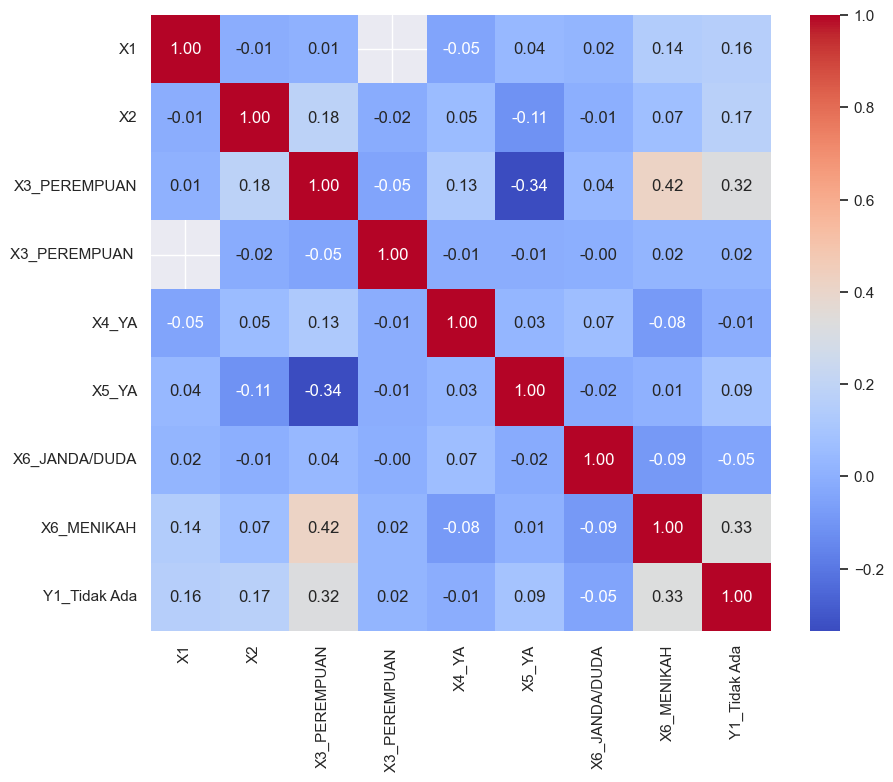

In [8]:
# Assuming df2 is your DataFrame
df_encoded = pd.get_dummies(df2, columns=['X3', 'X4', 'X5', 'X6', 'Y1'], drop_first=True)

# Now, calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

**MISSING VALUE TREATMENT**

In [9]:
df2.isnull().sum()
df2.isna().sum()

X1    547
X2    139
X3    133
X4    134
X5    135
X6    273
Y1    365
dtype: int64

**VISUALIZATION OF MISSING VALUE**

<Axes: >

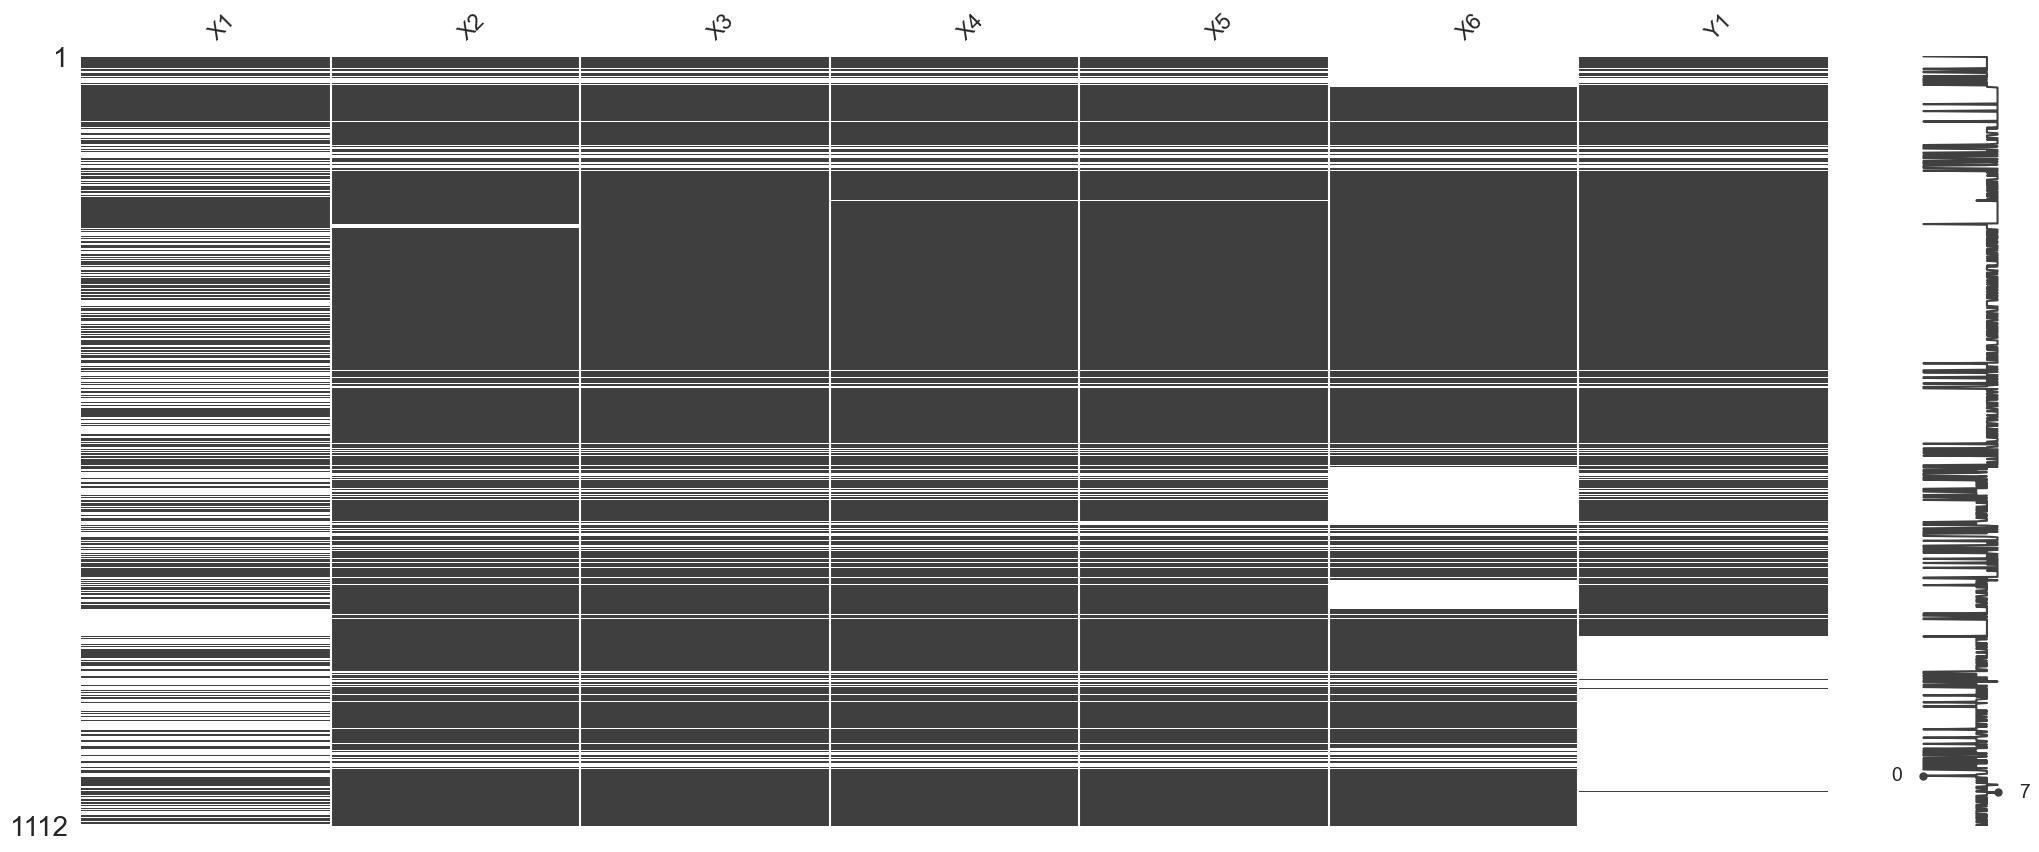

In [10]:
import missingno as msno
msno.matrix(df2)

<Axes: >

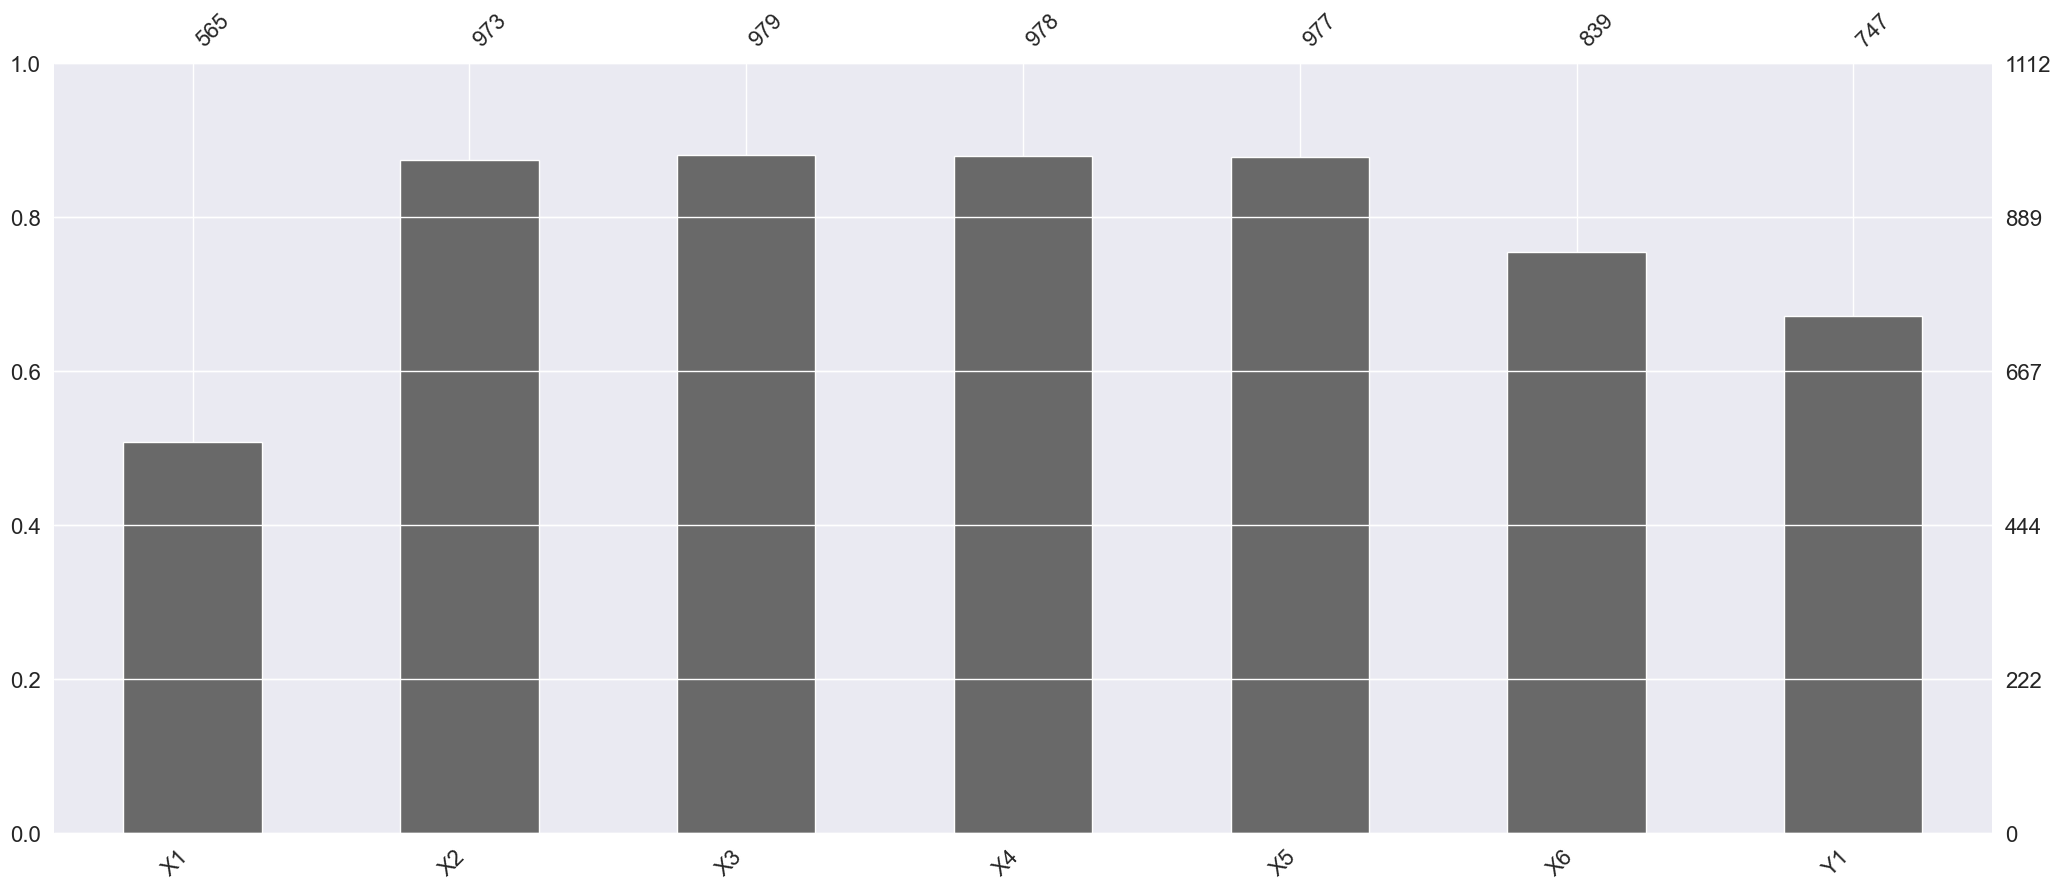

In [11]:
msno.bar(df2)

<Axes: >

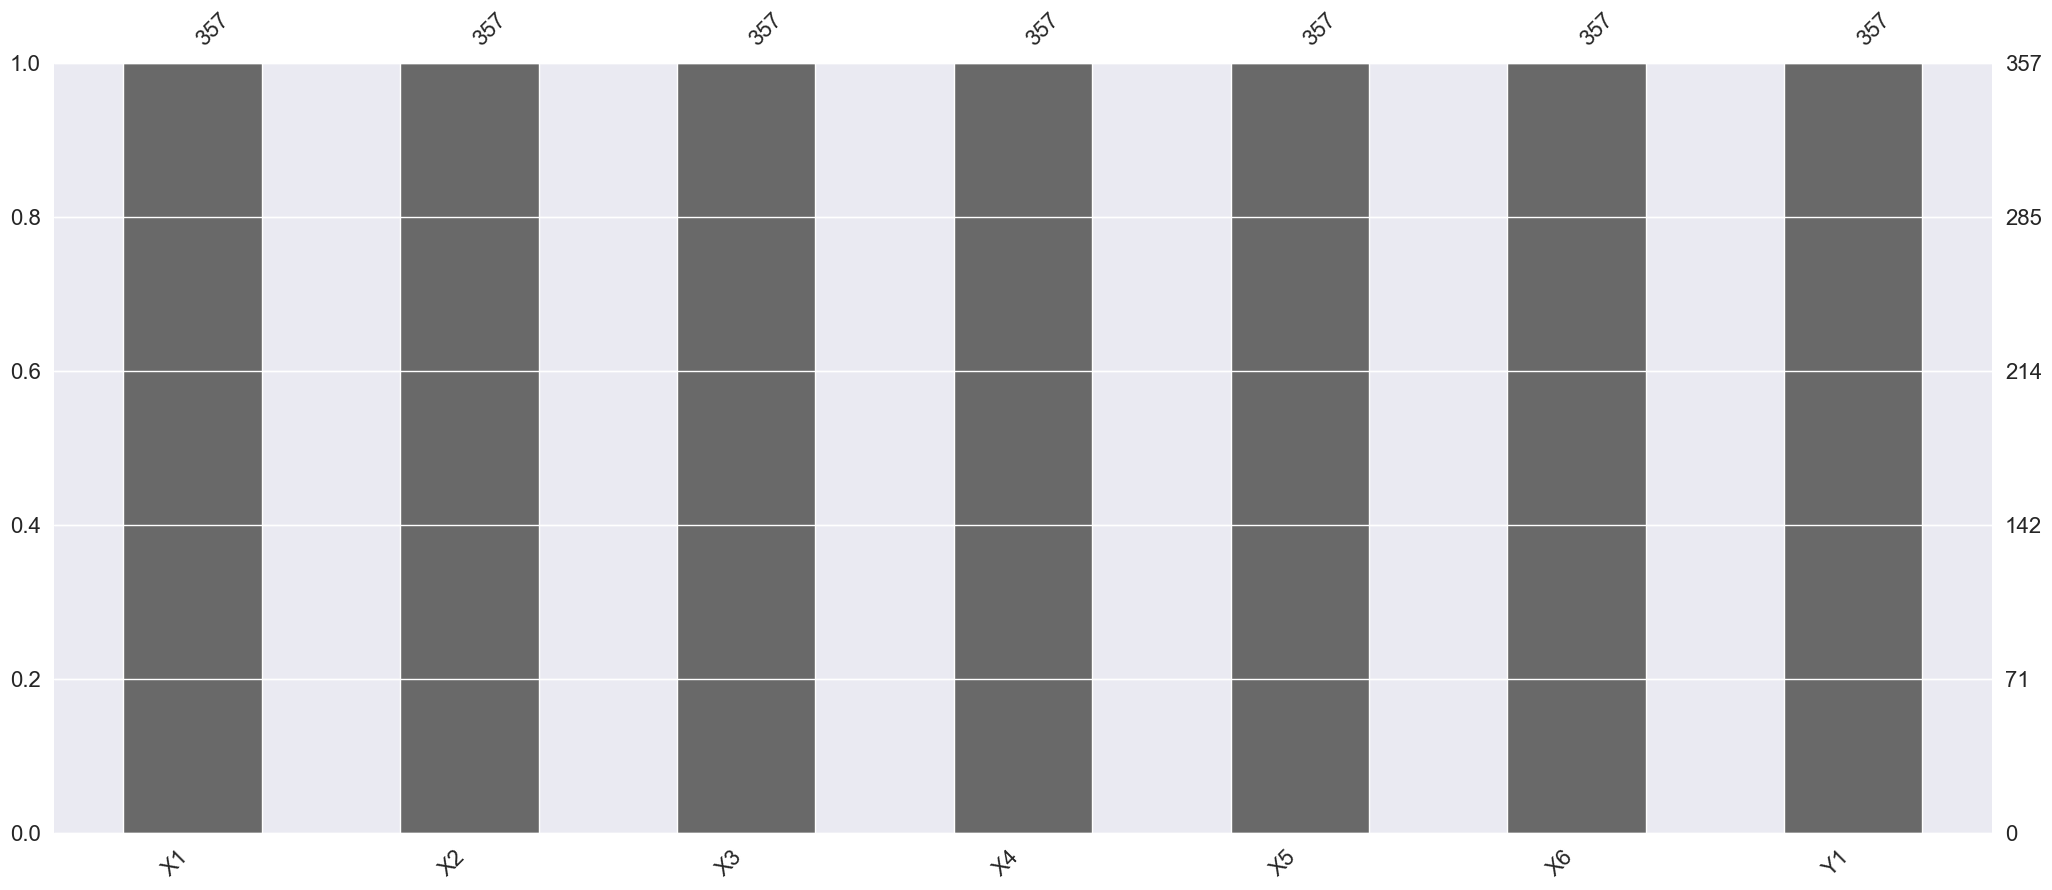

In [12]:
df_droped = df2.dropna()    # After Missing Value Treatment
msno.bar(df_droped)

**EXPLORATORY DATA ANALYSIS**

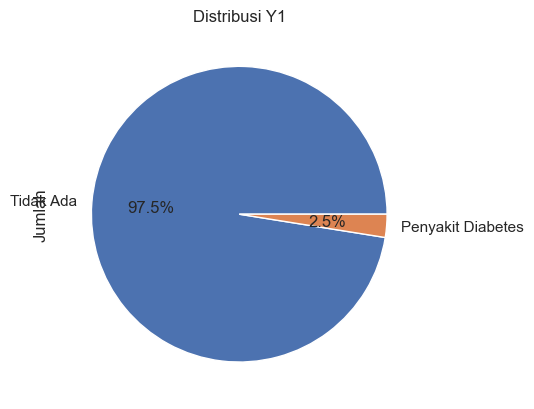

In [13]:
df3=df_droped

# Lihat distribusi data riwayat PTM
df3['Y1'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Tidak Ada', 'Penyakit Diabetes'])

# Tambahkan judul dan label
plt.title('Distribusi Y1')
plt.ylabel('Jumlah')

# Tampilkan plot
plt.show()

In [14]:
#df2 = df_1.rename(columns = {"Umur": "X1", "BMI": "X2", "Jenis Kelamin" : "X3", "Kurangnya Aktivitas Fisik" : "X4", "Merokok": "X5","Status Perkawinan" : "X6", "Riwayat PTM": "Y1"}) 

#print(df2)

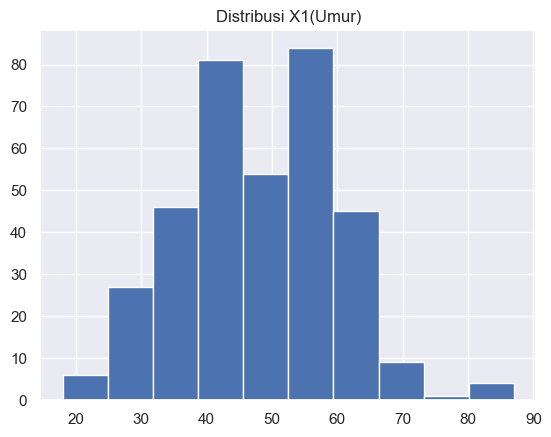

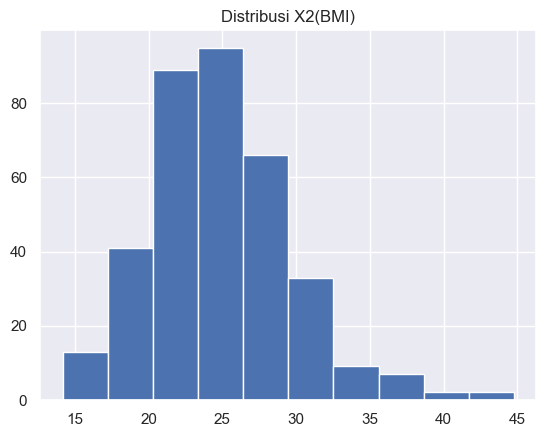

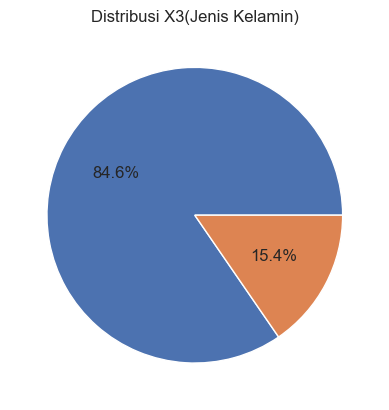

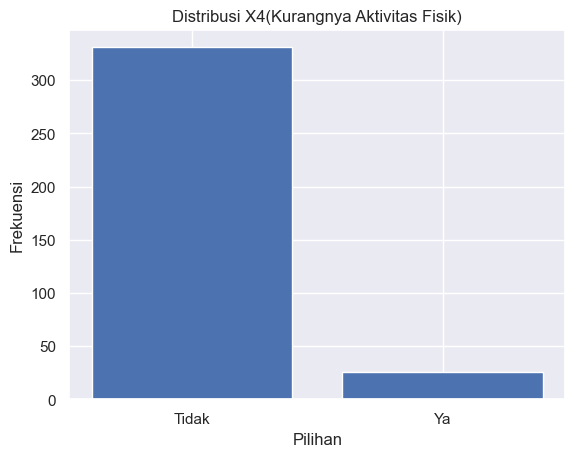

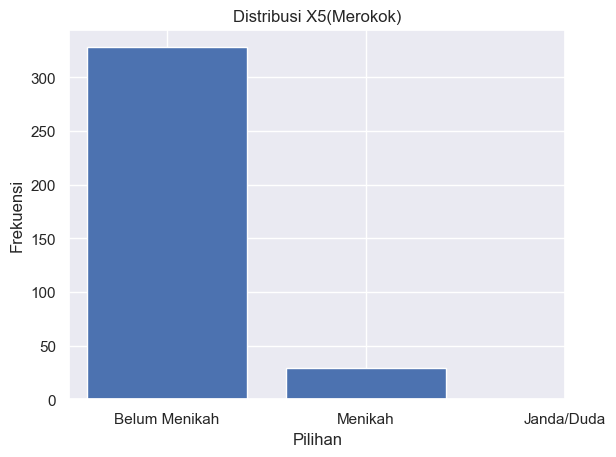

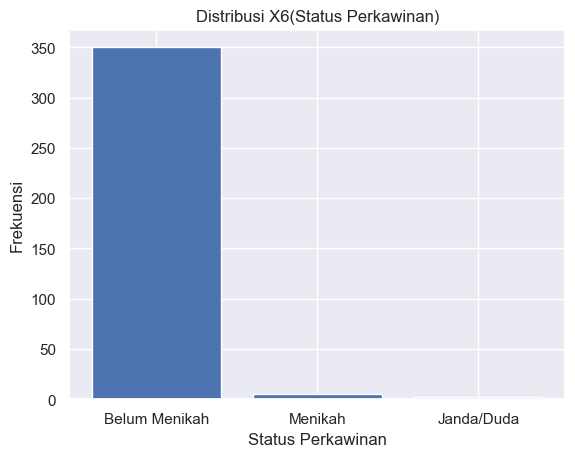

In [15]:
plt.hist(df3["X1"])
plt.title("Distribusi X1(Umur)")
plt.show()

plt.hist(df3["X2"])
plt.title("Distribusi X2(BMI)")
plt.show()

plt.pie(df3["X3"].value_counts(), autopct="%.1f%%")
plt.title("Distribusi X3(Jenis Kelamin)")
plt.show()

plt.bar(df3["X4"].value_counts().index, df3["X4"].value_counts().values)
plt.title("Distribusi X4(Kurangnya Aktivitas Fisik)")
plt.xlabel("Pilihan")
plt.ylabel("Frekuensi")
plt.xticks([0, 1], ["Tidak", "Ya"])
plt.show()

plt.bar(df3["X5"].value_counts().index, df3["X5"].value_counts().values)
plt.title("Distribusi X5(Merokok)")
plt.xlabel("Pilihan")
plt.ylabel("Frekuensi")
plt.xticks([0, 1, 2], ["Belum Menikah", "Menikah", "Janda/Duda"])
plt.show()

plt.bar(df3["X6"].value_counts().index, df3["X6"].value_counts().values)
plt.title("Distribusi X6(Status Perkawinan)")
plt.xlabel("Status Perkawinan")
plt.ylabel("Frekuensi")
plt.xticks([0, 1, 2], ["Belum Menikah", "Menikah", "Janda/Duda"])
plt.show()

In [16]:
df3['X6'].value_counts()

X6
MENIKAH       350
BELUM           5
JANDA/DUDA      2
Name: count, dtype: int64

**STATISTIK DESKRIPTIF**

In [17]:
df3.describe()      # Statistik Deskriptif

,X1,X2
count,357.000000,357.000000
mean,47.767507,24.891972
std,11.820486,4.720042
min,18.000000,14.181623
25%,40.000000,21.875000
50%,48.000000,24.671053
75%,56.000000,27.471384
max,87.000000,44.766360


**FEATURE ENGGINEERING**

Treatment Numerical Data to Class

In [18]:
# Convert X1 into categorical data 
i = 0
while i <= 125:
  if i >=0 and i <=30 :
      df3['X1'] [df3['X1'] == i] = 0
  elif i >=31 and i <=40 :
      df3['X1'] [df3['X1'] == i] = 1
  elif i >=41 and i <=50 :
      df3['X1'] [df3['X1'] == i] = 2
  elif i >=51 and i <=60 :
      df3['X1'] [df3['X1'] == i] = 3
  elif i >=61 and i <=70 :
      df3['X1'] [df3['X1'] == i] = 4
  elif i >=71 and i <=80 :
      df3['X1'] [df3['X1'] == i] = 5
  elif i >=81 and i <=125 :
      df3['X1'] [df3['X1'] == i] = 6
  i += 1
print(df3.info())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2256\429175839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X1'] [df3['X1'] == i] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2256\429175839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X1'] [df3['X1'] == i] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2256\429175839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X1'] [df3['X1'] == i] = 0
C:\Users\ASUS\Ap

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 45 to 1062
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      357 non-null    float64
 1   X2      357 non-null    float64
 2   X3      357 non-null    object 
 3   X4      357 non-null    object 
 4   X5      357 non-null    object 
 5   X6      357 non-null    object 
 6   Y1      357 non-null    object 
dtypes: float64(2), object(5)
memory usage: 22.3+ KB
None


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2256\429175839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X1'] [df3['X1'] == i] = 4
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2256\429175839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X1'] [df3['X1'] == i] = 4
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2256\429175839.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X1'] [df3['X1'] == i] = 4
C:\Users\ASUS

In [19]:
# Create a sample data frame with decimal data
df4 = pd.DataFrame(df3.X2)

# Print the original data frame
print("Original Data Frame:")
print(df4)

# Define a custom function to convert decimal data to integers
def convert_decimal_to_int(x):
    if isinstance(x, float):
        return int(x)
    return x

# Apply the custom function to each element in the data frame
df4 = df4.applymap(convert_decimal_to_int)

# Print the modified data frame
print("\nModified Data Frame:")
print(df4)

Original Data Frame:
             X2
45    23.372576
46    34.131113
47    30.222222
48    31.217482
49    25.109569
...         ...
751   29.515939
756   28.803364
902   38.805698
1051  17.156262
1062  19.333730

[357 rows x 1 columns]

Modified Data Frame:
      X2
45    23
46    34
47    30
48    31
49    25
...   ..
751   29
756   28
902   38
1051  17
1062  19

[357 rows x 1 columns]


In [20]:
#Convert X2 into categorical data 
i = 0
while i <= 45:
  if i >=0 and i <=18.5 :
      df4['X2'] [df4['X2'] == i] = 0
  elif i >=19 and i <=25 :
      df4['X2'] [df4['X2'] == i] = 1
  elif i >=26 and i <=30 :
      df4['X2'] [df4['X2'] == i] = 2
  elif i >=31 and i <=50 :
      df4['X2'] [df4['X2'] == i] = 3
  i += 1
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 45 to 1062
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X2      357 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB
None


In [21]:
df5 = df3.drop('X2', axis=1)

In [22]:
df_final = pd.concat([df5,df4], axis=1)
print(df_final)

df_final.to_csv(r'D:\Skripsi\Sc\2. Reza\csv_new.csv', index=False)

       X1         X3     X4     X5       X6                 Y1  X2
45    3.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   1
46    2.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   3
47    2.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   2
48    2.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   3
49    1.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   1
...   ...        ...    ...    ...      ...                ...  ..
751   4.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   2
756   4.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   2
902   0.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   3
1051  3.0  LAKI-LAKI  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   0
1062  3.0  LAKI-LAKI  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   1

[357 rows x 7 columns]


In [23]:
df6 = pd.read_csv(r'D:\Skripsi\Sc\2. Reza\csv_new.csv')
df6.head()      # Menampilkan data teratas

,X1,X3,X4,X5,X6,Y1,X2
0,3.0,PEREMPUAN,TIDAK,TIDAK,MENIKAH,Penyakit Diabetes,1
1,2.0,PEREMPUAN,TIDAK,TIDAK,MENIKAH,Tidak Ada,3
2,2.0,PEREMPUAN,TIDAK,TIDAK,MENIKAH,Penyakit Diabetes,2
3,2.0,PEREMPUAN,TIDAK,TIDAK,MENIKAH,Tidak Ada,3
4,1.0,PEREMPUAN,TIDAK,TIDAK,MENIKAH,Tidak Ada,1


Treatment Categorical Data to Class

In [24]:
# Sample DataFrame
df7 = pd.DataFrame(df6)

# Display the original DataFrame
print("Original DataFrame:")
print(df6)  

# Replace 'Women' with 0 and 'Men' with 1 in the 'Gender' column
df7['X3'] = df7['X3'].replace({'PEREMPUAN': 0, 'LAKI-LAKI': 1})
df7['X4'] = df7['X4'].replace({'TIDAK': 0, 'YA': 1})
df7['X5'] = df7['X5'].replace({'TIDAK': 0, 'YA': 1})
df7['X6'] = df7['X6'].replace({'MENIKAH': 0, 'JANDA/DUDA': 1, 'BELUM': 2})
df7['Y1'] = df7['Y1'].replace({'Tidak Ada': 0, 'Penyakit Diabetes': 1})

# Display the modified DataFrame
print("\nDataFrame after encoding:")
print(df7)

df7.to_csv(r'D:\Skripsi\Sc\2. Reza\final_data.csv', index=False)

Original DataFrame:
      X1         X3     X4     X5       X6                 Y1  X2
0    3.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   1
1    2.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   3
2    2.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   2
3    2.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   3
4    1.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   1
..   ...        ...    ...    ...      ...                ...  ..
352  4.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   2
353  4.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH          Tidak Ada   2
354  0.0  PEREMPUAN  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   3
355  3.0  LAKI-LAKI  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   0
356  3.0  LAKI-LAKI  TIDAK  TIDAK  MENIKAH  Penyakit Diabetes   1

[357 rows x 7 columns]

DataFrame after encoding:
      X1  X3  X4  X5  X6  Y1  X2
0    3.0   0   0   0   0   1   1
1    2.0   0   0   0   0   0   3
2    2.0   0   0   0   0   1   2
3    